In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

from collections import Counter


The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
aa_order=['*', 'G','A','V', 'L', 'I', 'M', 'C', 'P', 'W', 'F', 'Y', 'S', 'T', 'N', 'Q', 'H', 'K', 'R', 'D', 'E']
# same aa order as in the heatmaps

In [3]:
pdb_interface_annot = './pdb/1p6o/dist_regions_1p6o_bio_check.pdb'
# import pdb interface annotation file

line_len_counter = Counter()
dict_of_dict_interface = {}
# containers to read the pdb file and extract interface info

with open(pdb_interface_annot, 'r') as source:
    # open pdb file
    
    for line in source:
        line = line.strip('\n')
        line=[x for x in line.split(' ') if x != '']
        # loop through line and format lines
        
        line_len_counter[len(line)] +=1
        # increment line counter. This is used to help verify that 
        # the pdb file is formatted uniformly (sometimes separators
        # have unequal number of spaces). Some manual adjustement of
        # the source file might be required
        
                
        if int(line[5]) not in list(dict_of_dict_interface.keys()):
            # check if there is already an entry for the residue
            
            aa_dict = {}
            # container for info on the annotation
            
            aa_dict['aa'] = line[3]
            aa_dict['interface'] = float(line[10])
            # extract boththe residue an the interface annotation
            
            dict_of_dict_interface[int(line[5])] = aa_dict
            # add info to dict of dict
            
            
            
print(line_len_counter)    

Counter({11: 2443})


In [4]:
chain_A_indexes = range(3,159)
chain_B_indexes = range(201,359)
# define the pdb residue coordinates 
# corresponding to the two different chains

In [5]:
dict_chain_A ={}
# residue : interface annotation    pairs
# for chain A

for x in chain_A_indexes:
    # loop through annotations for chain A
    
    entry = dict_of_dict_interface[x]
    dict_chain_A[x] = entry['interface']
    # extract info, add entry to chain dict
    
len(dict_chain_A)
# get length. Two amino acids at the start of fcy1p 
# are missing from chain A, so the annotations of chain B
# will be used

156

In [6]:
dict_chain_B ={}
# residue : interface annotation    pairs
# for chain A

for x in chain_B_indexes:
    # loop through annotations for chain A

    
    entry = dict_of_dict_interface[x]
    dict_chain_B[x-200] = entry['interface']
    # extract info, add entry to chain dict with
    # appropriate offset

len(dict_chain_B)
# get length


158

In [7]:
for x in list(dict_chain_A.keys()):
    if dict_chain_A[x] != dict_chain_B[x]:
        print(x, dict_chain_A[x], dict_chain_B[x])
        # check for inconsistencies between chain A and B 
        # interface annotations
        
# the only mismatch in annotation is this this residue. I will consider it as adjacent (data from chain A will take precedence)

127 0.75 0.0


In [8]:
dict_chain_B[127] = 0.75
# change conflicting value

for x in list(dict_chain_A.keys()):
    if dict_chain_A[x] != dict_chain_B[x]:
        print(x, dict_chain_A[x], dict_chain_B[x])
        #check if inconstiencies are resolved

In [9]:
indexed_interface_col = {}
# dict container that will be converted to a series once 
# filled

index_val = 0
# index position counter

for x in range(2,159):    
        for y in range(0,21):
            # loop through FCY1 positions, then through amino acid variants
            
            indexed_interface_col[index_val] = dict_chain_B[x]
            # get interface annotation info from dict and add it to index
            
            index_val+=1
            # increment index
            
indexed_series = pd.Series(indexed_interface_col, name='interface')
# store interface annotation as a series
indexed_series

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3292    1.0
3293    1.0
3294    1.0
3295    1.0
3296    1.0
Name: interface, Length: 3297, dtype: float64

In [10]:
data_df = pd.read_csv('./abundance_change_norm_min10_median.csv', sep=',', index_col=0)
# import log2 fold-change and DMS score data generated by the fold_change
# notebook

data_df

,codon,wt,measured,CY_1,CY_1_R1,CY_1_MAD_1,CY_1_R2,CY_1_MAD_2,FC_1,FC_1_R1,...,FC_3_MAD_2,CY_1_to_2,CY_3_to_2,FC_1_to_2,FC_3_to_2,CY_123,FC_123,CY_score,FC_score,FC_CY_score
0,2,V,*,-3.848973,-3.934894,0.096862,-3.763052,0.213533,-4.425231,-4.769127,...,NaN,-3.928324,NaN,-3.755538,NaN,-3.928324,-3.755538,0.014447,-0.197819,NaN
1,2,V,G,-0.804103,-0.779520,0.051921,-0.828687,0.074847,-4.261140,-4.305138,...,NaN,-1.516574,NaN,-3.621105,NaN,-1.516574,-3.621105,0.768967,-0.163936,NaN
2,2,V,A,-0.725852,-0.455205,0.315889,-0.996499,0.119774,-3.792236,-3.869612,...,NaN,-1.454593,NaN,-3.236950,NaN,-1.454593,-3.236950,0.788358,-0.067115,NaN
3,2,V,V,-0.587940,-0.506614,0.391231,-0.669265,0.074170,-4.350391,-4.148804,...,NaN,-1.345357,NaN,-3.694224,NaN,-1.345357,-3.694224,0.822532,-0.182365,NaN
4,2,V,L,-0.906831,-0.790490,0.306158,-1.023172,0.072184,-4.320468,-4.381116,...,NaN,-1.597941,NaN,-3.669710,NaN,-1.597941,-3.669710,0.743511,-0.176187,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,158,E,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.098622,NaN,-1.368167,NaN,-5.426396,-1.368167,-5.426396,0.815396,-0.618938,NaN
3293,158,E,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.893444,NaN,-0.850690,NaN,-3.984117,-0.850690,-3.984117,0.977290,-0.255429,NaN
3294,158,E,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.468545,NaN,-1.459136,NaN,-5.164829,-1.459136,-5.164829,0.786936,-0.553013,NaN
3295,158,E,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.606174,NaN,-1.439848,NaN,-5.406192,-1.439848,-5.406192,0.792971,-0.613846,NaN


In [11]:
data_df['interface'] = indexed_series
data_df
# add interface annotation to DataFrame

,codon,wt,measured,CY_1,CY_1_R1,CY_1_MAD_1,CY_1_R2,CY_1_MAD_2,FC_1,FC_1_R1,...,CY_1_to_2,CY_3_to_2,FC_1_to_2,FC_3_to_2,CY_123,FC_123,CY_score,FC_score,FC_CY_score,interface
0,2,V,*,-3.848973,-3.934894,0.096862,-3.763052,0.213533,-4.425231,-4.769127,...,-3.928324,NaN,-3.755538,NaN,-3.928324,-3.755538,0.014447,-0.197819,NaN,0.0
1,2,V,G,-0.804103,-0.779520,0.051921,-0.828687,0.074847,-4.261140,-4.305138,...,-1.516574,NaN,-3.621105,NaN,-1.516574,-3.621105,0.768967,-0.163936,NaN,0.0
2,2,V,A,-0.725852,-0.455205,0.315889,-0.996499,0.119774,-3.792236,-3.869612,...,-1.454593,NaN,-3.236950,NaN,-1.454593,-3.236950,0.788358,-0.067115,NaN,0.0
3,2,V,V,-0.587940,-0.506614,0.391231,-0.669265,0.074170,-4.350391,-4.148804,...,-1.345357,NaN,-3.694224,NaN,-1.345357,-3.694224,0.822532,-0.182365,NaN,0.0
4,2,V,L,-0.906831,-0.790490,0.306158,-1.023172,0.072184,-4.320468,-4.381116,...,-1.597941,NaN,-3.669710,NaN,-1.597941,-3.669710,0.743511,-0.176187,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,158,E,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.368167,NaN,-5.426396,-1.368167,-5.426396,0.815396,-0.618938,NaN,1.0
3293,158,E,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.850690,NaN,-3.984117,-0.850690,-3.984117,0.977290,-0.255429,NaN,1.0
3294,158,E,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.459136,NaN,-5.164829,-1.459136,-5.164829,0.786936,-0.553013,NaN,1.0
3295,158,E,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.439848,NaN,-5.406192,-1.439848,-5.406192,0.792971,-0.613846,NaN,1.0


## Add MutateX ddG data

In [12]:
mutate_x_df = pd.read_csv('./pdb/final_mat_1p6o.txt', sep='\t')
# read the MutateX output file (see methods for MutateX run option)
# contains the following info:
#   Chain:    
#   WT_res:
#   Position:
#   Mut_res:
#   Mean_ddG_stab_HET:    effect of mutation on protein stability in a wt/mutant heteromer as ddG
#   Mean_ddG_stab_HM:     effect of mutation on protein stability in a mutant/mutant homomer as ddG
#   Mean_ddG_int_HET:     effect of mutation on dimer interaction stability in a wt/mutant heteromer as ddG
#   Mean_ddG_int_HM:      effect of mutation on dimer interaction stability in a mutant/mutant heteromer as ddG

mutate_x_df

,Chain,WT_res,Position,Mut_res,Mean_ddG_stab_HET,Mean_ddG_stab_HM,Mean_ddG_int_HET,Mean_ddG_int_HM
0,A,T,3,A,2.05273,2.04055,0.01616,0.01616
1,A,T,3,C,2.13526,2.21034,0.01408,0.00524
2,A,T,3,D,1.83904,1.83749,0.06802,0.04876
3,A,T,3,E,2.16374,2.09163,0.04084,0.02010
4,A,T,3,F,8.24804,8.49569,0.01032,0.01150
...,...,...,...,...,...,...,...,...
3115,A,E,158,S,0.44536,0.86542,0.12116,0.18876
3116,A,E,158,T,0.67786,1.33676,0.28856,0.53472
3117,A,E,158,V,0.40545,0.71487,0.36616,0.68928
3118,A,E,158,W,-0.41447,-0.82256,0.18068,0.33580


In [13]:
wt = mutate_x_df['Mut_res'] == mutate_x_df['WT_res']
# check ddg for wt to wt simluations to have an idea of the background noise

In [14]:
mutate_x_df[wt]

,Chain,WT_res,Position,Mut_res,Mean_ddG_stab_HET,Mean_ddG_stab_HM,Mean_ddG_int_HET,Mean_ddG_int_HM
16,A,T,3,T,-0.00186,-0.00232,0.00000,0.00000
25,A,G,4,G,0.00000,0.00000,0.00000,0.00000
45,A,G,5,G,0.00000,0.00000,0.00000,0.00000
70,A,M,6,M,0.00014,0.00260,0.00000,0.00000
80,A,A,7,A,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...
3023,A,E,154,E,0.00000,0.00000,0.00000,0.00000
3042,A,D,155,D,0.01522,0.02225,0.00848,0.01126
3067,A,I,156,I,-0.00152,-0.00291,-0.00018,-0.00032
3085,A,G,157,G,0.00000,0.00000,0.00000,0.00000


(-7.0, 95.0)

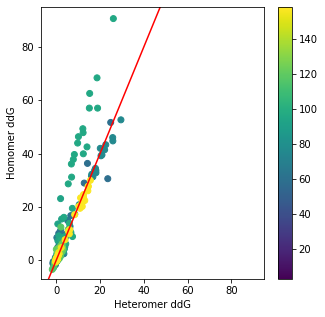

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(mutate_x_df['Mean_ddG_int_HET'], mutate_x_df['Mean_ddG_int_HM'], c=mutate_x_df['Position'])
plt.colorbar()
plt.xlabel('Heteromer ddG')
plt.ylabel('Homomer ddG')
# plot dimer interaction ddG in heteromer mutants vs homomers, with positions as color

x=np.linspace(-7,95)
plt.plot(x, 2*x, 'r-')
# show a purely additive model where ddg_HM = ddg_HET*2

plt.ylim(-7,95)
plt.xlim(-7,95)

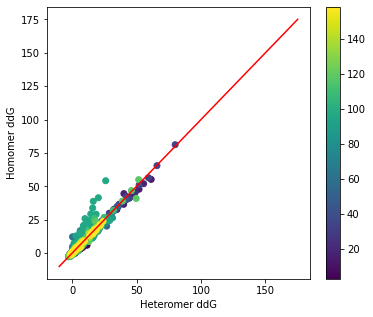

In [16]:
plt.figure(figsize=(6,5))

plt.scatter(mutate_x_df['Mean_ddG_stab_HET'], mutate_x_df['Mean_ddG_stab_HM']/2, c=mutate_x_df['Position'])
plt.colorbar(fraction=1/6)
plt.xlabel('Heteromer ddG')
plt.ylabel('Homomer ddG')
# plot dimer protein stability ddG in heteromer mutants vs homomers, with positions as color

x=np.linspace(-10,175)
plt.plot(x, x, 'r-')
# show a purely additive model where ddg_HM = ddg_HET*2

In [17]:
indexed_ddG_struc_HET_col = {}
indexed_ddG_struc_HM_col = {}
indexed_ddG_inter_HET_col = {}
indexed_ddG_inter_HM_col = {}
# dict containers that will be converted to series once 
# filled

index_val = 0
# index position counter

for x in range(2,159):
    for y in range(0,21):
        # loop through FCY1 positions, then through amino acid variants
        
        select_cell = (mutate_x_df['Position'] == x) & (mutate_x_df['Mut_res'] == aa_order[y])
        # based on FCY1 position and observed amino acid, select the correct MutateX df row

        if x == 2:
            indexed_ddG_struc_HET_col[index_val] = np.NaN
            indexed_ddG_struc_HM_col[index_val] = np.NaN
            indexed_ddG_inter_HET_col[index_val] = np.NaN
            indexed_ddG_inter_HM_col[index_val] = np.NaN
            # set values to NaN for all values for position 2, which is missing from the crystal structure

        elif y == 0:
            indexed_ddG_struc_HET_col[index_val] = np.NaN
            indexed_ddG_struc_HM_col[index_val] = np.NaN
            indexed_ddG_inter_HET_col[index_val] = np.NaN
            indexed_ddG_inter_HM_col[index_val] = np.NaN
            # set values to NaN for all nonsense variants

        else:
            indexed_ddG_struc_HET_col[index_val] = float(mutate_x_df[select_cell]['Mean_ddG_stab_HET'])
            indexed_ddG_struc_HM_col[index_val] = float(mutate_x_df[select_cell]['Mean_ddG_stab_HM'])
            indexed_ddG_inter_HET_col[index_val] =  float(mutate_x_df[select_cell]['Mean_ddG_int_HET'])
            indexed_ddG_inter_HM_col[index_val] = float(mutate_x_df[select_cell]['Mean_ddG_int_HM'])
            # for other mutants, find value and add it to the correct dict



        index_val+=1
        # increment index
            
indexed_series_het_struct = pd.Series(indexed_ddG_struc_HET_col, name='ddG_struc_HET')
indexed_series_hm_struct = pd.Series(indexed_ddG_struc_HM_col, name='ddG_struc_HM')
indexed_series_het_inter= pd.Series(indexed_ddG_inter_HET_col, name='ddG_inter_HET')
indexed_series_hm_inter= pd.Series(indexed_ddG_inter_HM_col, name='ddG_inter_HM')
# convert dict to Series 

In [18]:
data_df['ddG_struc_HET'] = indexed_series_het_struct
data_df['ddG_struc_HM'] = indexed_series_hm_struct
data_df['ddG_inter_HET'] = indexed_series_het_inter
data_df['ddG_inter_HM'] = indexed_series_hm_inter
# add new columns to DataFrame

## Get evolutionnary rate from Rate4site

In [19]:
r4s_row_dict = {}
# container that will store rate4site annotations

with open('./pdb/curated.r4s', 'r') as source:
    # open curated ortholog rate4site scores (generate with the 
    # set of orthologs shown in the phylogeny)
    
    for line in source:
        # loop thourhg file
        
        if line.startswith('#') == False:
            # skip header
            
            line = line.strip('\n')
            line = [x for x in line.split(' ') if x != '']
            # get info as list
            
            if len(line) > 1:
                # skip empy lines
                
                line_dict = {}
                # container fot line annots
                
                line_dict['pos'] = int(line[0])
                line_dict['score'] = float(line[2])
                # store FCY1 position and R4s score
                
                interval = line[3].strip('[]').split(',')
                # extract confidence interval
                
                line_dict['lower'] = float(interval[0])
                line_dict['upper'] = float(interval[1])
                # get lower and upper confidence interval bounds
                
                r4s_row_dict[int(line[0])] = line_dict
                # store all this info as a dict
                
                
new_r4s_df = pd.DataFrame.from_dict(r4s_row_dict, orient='index')
# convert dict of dicts to a DataFrame
new_r4s_df

,pos,score,lower,upper
1,1,0.5068,-0.0834,1.0443
2,2,1.4201,0.5044,2.5356
3,3,0.6787,0.1633,1.0443
4,4,0.9772,0.5044,1.0443
5,5,1.8833,0.5044,2.5356
...,...,...,...,...
154,154,-0.9265,-0.9999,-0.8975
155,155,-0.9460,-1.0365,-0.8975
156,156,-0.8920,-0.9999,-0.8312
157,157,-0.6409,-0.8312,-0.5552


In [20]:
score_dict=dict(new_r4s_df['score'])
# convert score column to a dict

indexed_r4s_col = {}
# dict container that will be converted to a series once 
# filled

index_val = 0
# index position counter

for x in range(2,159):
    for y in range(0,21):
        # loop through FCY1 positions, then through amino acid variants
        
        indexed_r4s_col[index_val] = score_dict[x]
        # get R4s score and add it to index
        
        index_val+=1
        # increment index
            
indexed_series = pd.Series(indexed_r4s_col, name='r4s_score')
# store R4s score as a series
indexed_series

0       1.4201
1       1.4201
2       1.4201
3       1.4201
4       1.4201
         ...  
3292    0.0553
3293    0.0553
3294    0.0553
3295    0.0553
3296    0.0553
Name: r4s_score, Length: 3297, dtype: float64

In [21]:
data_df['r4s_score'] = indexed_series
# add new column to DataFrame

## Get RSA from the xssp database values

In [22]:
max_asa_vals = [121,265,187,187,148,214,214,97,216,195,191,230,203,228,154,143,163,264,255,165]
asa_AA = ['A','R','N','D','C','E','Q','G','H','I','L','K','M','F','P','S','T','W','Y','V']
# Max solvent accessibility values matched to amino acids, based on Tien et al 2013, PLoS One

max_asa_dict = {}
# container to store max asa as dict

for x in range(0, len(max_asa_vals)):
    # loop through values in list
    
    max_asa_dict[asa_AA[x]] = max_asa_vals[x]
    # add asa for aa in dict
    
max_asa_dict

{'A': 121,
 'R': 265,
 'N': 187,
 'D': 187,
 'C': 148,
 'E': 214,
 'Q': 214,
 'G': 97,
 'H': 216,
 'I': 195,
 'L': 191,
 'K': 230,
 'M': 203,
 'F': 228,
 'P': 154,
 'S': 143,
 'T': 163,
 'W': 264,
 'Y': 255,
 'V': 165}

In [23]:
xssp_file = './pdb/f6fceb0e-a2a4-4512-bf30-385eea962f24.dssp'
# import xssp file for pdb file 1p6o

In [24]:
import DSSPparser
print(DSSPparser.__version__)
# import a dssp file parser (https://github.com/neolei/DSSPparser)

from DSSPparser import parseDSSP
# import parsing function

parse_ = parseDSSP('./pdb/f6fceb0e-a2a4-4512-bf30-385eea962f24.dssp') 
parse_.parse() 
pddict = parse_.dictTodataframe()
# parse file and convert to DataFrame

pddict.columns

0.10


Index(['resnum', 'inscode', 'chain', 'aa', 'struct', 'structdetails', 'bp1',
       'bp2', 'acc', 'h_nho1', 'h_ohn1', 'h_nho2', 'h_ohn2', 'tco', 'kappa',
       'alpha', 'phi', 'psi', 'xca', 'yca', 'zca', 'rcsb_given_chain',
       'author_given_chain'],
      dtype='object')

In [25]:
chain_A_res = range(0,156)
print(len(chain_A_res))
# structure file residue coordinates range for chain A

chain_B_res = range(160, 318)
print(len(chain_B_res))
# structure file residue coordinates range for chain B

156
158


In [26]:
chain_A_RSA_vals = {}
# container for chain A RSA values

aa_index=3
# adjust starting index for missing AAs in the structure

for index in chain_A_res:
    # for chain A residue
    
    aa=pddict.loc[index]['aa']
    acc = float(pddict.loc[index]['acc'])
    # get residue and solvent accessibility
    
    RSA = acc/max_asa_dict[aa]
    # calculate relative solvent accessibility
    
    chain_A_RSA_vals[aa_index] = RSA
    # add value to dict
    
    aa_index += 1
    # increment index

chain_A_RSA_vals[1] = np.NaN
chain_A_RSA_vals[2] = np.NaN
# set value to null for FCY1 positions 1 and 2
    
#chain_A_RSA_vals

In [27]:
chain_B_RSA_vals = {}
# container for chain A RSA values

aa_index=1
# adjust starting index for missing AAs in the structure

for index in chain_B_res:
    # for chain B residue
    
    aa=pddict.loc[index]['aa']
    acc = float(pddict.loc[index]['acc'])
    # get residue and solvent accessibility
    
    RSA = acc/max_asa_dict[aa]
    # calculate relative solvent accessibility
    
    chain_B_RSA_vals[aa_index] = RSA
    # add value to dict
    
    aa_index += 1
    # increment index
    
#chain_B_RSA_vals

In [28]:
RSA_df = pd.DataFrame([pd.Series(chain_A_RSA_vals, name='chain_A'),pd.Series(chain_B_RSA_vals, name='chain_B')]).T
RSA_df['pos'] = RSA_df.index
# store RSA info as a DataFrame

RSA_df

,chain_A,chain_B,pos
1,NaN,0.812808,1
2,NaN,0.284848,2
3,0.564417,0.705521,3
4,0.927835,0.494845,4
5,0.618557,0.237113,5
...,...,...,...
154,0.088785,0.093458,154
155,0.005348,0.010695,155
156,0.076923,0.087179,156
157,0.020619,0.020619,157


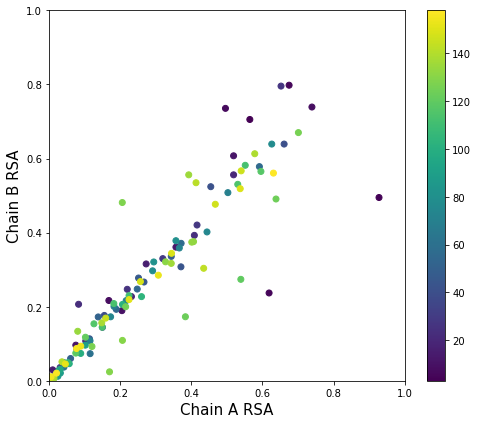

In [29]:
plt.figure(figsize=(7,6))
plt.scatter(x=RSA_df['chain_A'], y=RSA_df['chain_B'], c=RSA_df['pos'], cmap='viridis')
plt.colorbar(fraction=(1/7), )
plt.xlabel('Chain A RSA', fontsize=15)
plt.ylabel('Chain B RSA', fontsize=15)
plt.xlim(0,1)
plt.ylim(0,1)
plt.tight_layout()
# compare chain A RSA with chain B RSA

In [30]:
import scipy.stats as stats

In [31]:
stats.spearmanr(RSA_df['chain_A'], RSA_df['chain_B'], nan_policy='omit')
# RSA is very well correlated

SpearmanrResult(correlation=0.9762597791820181, pvalue=3.236598911352513e-104)

In [32]:
RSA_df['mean_RSA'] = RSA_df.loc[:][['chain_A', 'chain_B']].mean(axis=1)
# based on this, use the mean chain A and chain B RSA 

RSA_df

,chain_A,chain_B,pos,mean_RSA
1,NaN,0.812808,1,0.812808
2,NaN,0.284848,2,0.284848
3,0.564417,0.705521,3,0.634969
4,0.927835,0.494845,4,0.711340
5,0.618557,0.237113,5,0.427835
...,...,...,...,...
154,0.088785,0.093458,154,0.091121
155,0.005348,0.010695,155,0.008021
156,0.076923,0.087179,156,0.082051
157,0.020619,0.020619,157,0.020619


In [33]:
pdb_source = './pdb/1p6o.pdb'
# source pdb file to get temperature values for each residue

temp_list_dict = {}
# container for residue : temperature info

with open(pdb_source, 'r') as source:
    for line in source:
        # open pdb file and loop through it
        
        if line.startswith("ATOM")==True:
            line=line.strip('\n')
            line=[x for x in line.split(' ') if x != '']
            # format line
            
            temp = float(line[10])
            pos = int(line[5])
            # get temp and residue position
            
            if pos not in list(temp_list_dict.keys()):
                temp_list_dict[pos] = [temp]
                # if residue not in dict, make new entry 
                
            else:
                temp_list_dict[pos] += [temp]
                # else add recorded temp to list
            
#temp_list_dict

In [34]:
average_temp_dict = {}
# container for mean temp measured for each ATOM of residue

for aa in (temp_list_dict.keys()):
    # loop through pdb file residue

    average_temp = np.mean(temp_list_dict[aa])
    # compute mean temp for residue
    
    average_temp_dict[aa] = average_temp
    # add value to dict

In [35]:
chain_A_indexes = range(3,159)
chain_B_indexes = range(201,359)
# pdb positions for chain A and B

In [36]:
chain_A_temp = {}
# container for chain A mean temp values

for aa in chain_A_indexes:
    chain_A_temp[aa] = average_temp_dict[aa]
    # loop through chain A indexes and add value to dict
    
chain_A_temp[1] = np.nan
chain_A_temp[2] = np.nan
# set values to nan for residue 1 and 2

In [37]:
chain_B_temp = {}
# container for chain B mean temp values

for x in chain_B_indexes:
    chain_B_temp[(x-200)] = average_temp_dict[x]
    # loop through chain B indexes and add value to dict
    

In [38]:
RSA_df['temp_A'] = pd.Series(chain_A_temp)
RSA_df['temp_B'] = pd.Series(chain_B_temp)
# add temp to RSA df as column

RSA_df['mean_temp'] = RSA_df.loc[:][['temp_A', 'temp_B']].mean(axis=1)
# compute mean chain A and B temp

RSA_df

,chain_A,chain_B,pos,mean_RSA,temp_A,temp_B,mean_temp
1,NaN,0.812808,1,0.812808,NaN,26.490000,26.490000
2,NaN,0.284848,2,0.284848,NaN,31.314286,31.314286
3,0.564417,0.705521,3,0.634969,38.398571,34.132857,36.265714
4,0.927835,0.494845,4,0.711340,35.247500,23.035000,29.141250
5,0.618557,0.237113,5,0.427835,20.810000,16.255000,18.532500
...,...,...,...,...,...,...,...
154,0.088785,0.093458,154,0.091121,11.413333,8.633333,10.023333
155,0.005348,0.010695,155,0.008021,9.570000,7.257500,8.413750
156,0.076923,0.087179,156,0.082051,12.021250,8.410000,10.215625
157,0.020619,0.020619,157,0.020619,11.647500,10.105000,10.876250


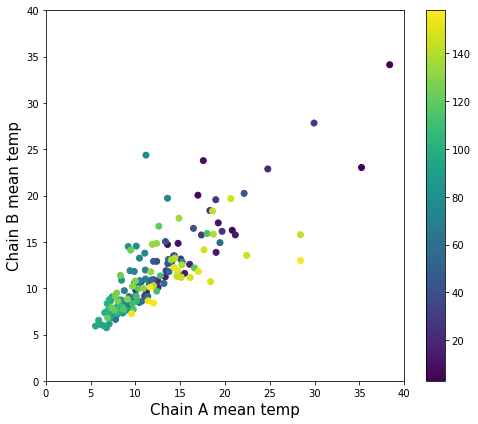

In [39]:
plt.figure(figsize=(7,6))

plt.scatter(x=RSA_df['temp_A'], y=RSA_df['temp_B'], c=RSA_df['pos'], cmap='viridis')
plt.colorbar(fraction=(1/7), )
plt.xlabel('Chain A mean temp', fontsize=15)
plt.ylabel('Chain B mean temp', fontsize=15)
plt.xlim(0,40)
plt.ylim(0,40)

# plot chain A temperature vs chain B tenmperature

plt.tight_layout()

In [40]:
print(stats.spearmanr(RSA_df['mean_RSA'], RSA_df['mean_temp']))
# correlation is good, and differences seem well dispersed. Will use mean Chain A and B value

SpearmanrResult(correlation=0.7212471007556052, pvalue=1.1667608969784673e-26)


## Add mean RSA and mean temp

In [41]:
indexed_RSA_col = {}
indexed_temp_col = {}
# dict containers that will be converted to a series once 
# filled

index_val=0
# index position counter

for x in range(2,159):
        for y in range(0,21):
            # loop through FCY1 positions, then through amino acid variants
            
            indexed_RSA_col[index_val] = RSA_df.loc[x]['mean_RSA']
            indexed_temp_col[index_val] = RSA_df.loc[x]['mean_temp']
            # get RSA and temp annotation info from dict and add it to index
            
            index_val+=1
            # increment index
            
indexed_series_RSA = pd.Series(indexed_RSA_col, name='RSA')
indexed_series_temp = pd.Series(indexed_temp_col, name='temp')
# store interface RSA and temp as a series

In [42]:
data_df['RSA'] = indexed_series_RSA
data_df['temp'] = indexed_series_temp
data_df

,codon,wt,measured,CY_1,CY_1_R1,CY_1_MAD_1,CY_1_R2,CY_1_MAD_2,FC_1,FC_1_R1,...,FC_score,FC_CY_score,interface,ddG_struc_HET,ddG_struc_HM,ddG_inter_HET,ddG_inter_HM,r4s_score,RSA,temp
0,2,V,*,-3.848973,-3.934894,0.096862,-3.763052,0.213533,-4.425231,-4.769127,...,-0.197819,NaN,0.0,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286
1,2,V,G,-0.804103,-0.779520,0.051921,-0.828687,0.074847,-4.261140,-4.305138,...,-0.163936,NaN,0.0,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286
2,2,V,A,-0.725852,-0.455205,0.315889,-0.996499,0.119774,-3.792236,-3.869612,...,-0.067115,NaN,0.0,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286
3,2,V,V,-0.587940,-0.506614,0.391231,-0.669265,0.074170,-4.350391,-4.148804,...,-0.182365,NaN,0.0,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286
4,2,V,L,-0.906831,-0.790490,0.306158,-1.023172,0.072184,-4.320468,-4.381116,...,-0.176187,NaN,0.0,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,158,E,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.618938,NaN,1.0,-0.08375,-0.23928,0.01440,-0.15748,0.0553,0.595794,20.715000
3293,158,E,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.255429,NaN,1.0,-0.63414,-1.22820,0.26376,0.25662,0.0553,0.595794,20.715000
3294,158,E,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.553013,NaN,1.0,-0.84740,-1.73269,0.27192,0.09690,0.0553,0.595794,20.715000
3295,158,E,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.613846,NaN,1.0,0.31390,0.64312,0.10866,0.19564,0.0553,0.595794,20.715000


## Generate figure S11

3120 3120
SpearmanrResult(correlation=0.9804739044056657, pvalue=0.0)
3120 3120
SpearmanrResult(correlation=0.8635186393760124, pvalue=0.0)
156 158
156 158


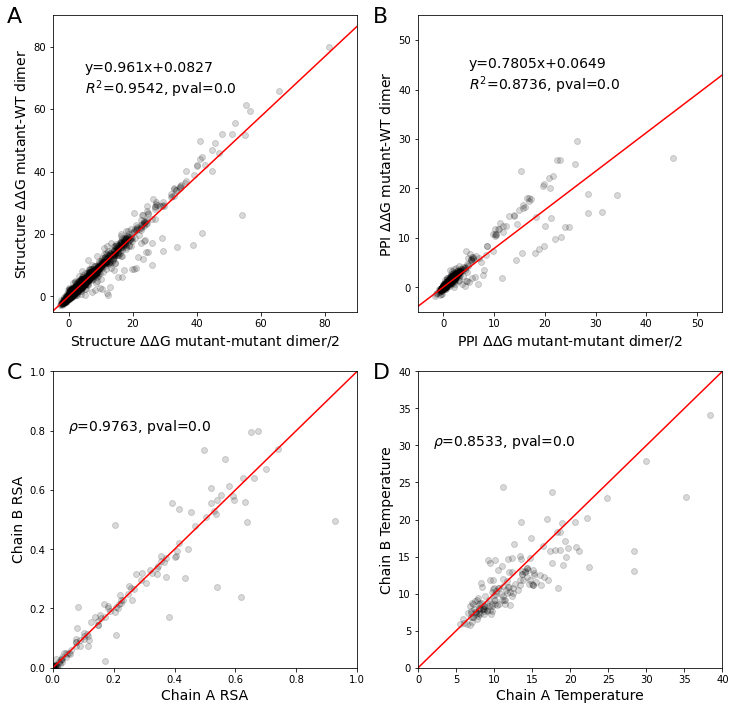

In [43]:
plt.figure(figsize=(12,12))

plt.subplot(221)

plt.scatter(mutate_x_df['Mean_ddG_stab_HM']/2, mutate_x_df['Mean_ddG_stab_HET'], color='k', alpha=0.15)

plt.xlim(-5,90)
plt.ylim(-5,90)


plt.xlabel(r'Structure $\Delta\Delta$G mutant-mutant dimer/2', fontsize=14)
plt.ylabel(r'Structure $\Delta\Delta$G mutant-WT dimer', fontsize=14)


slope, inter, r_val, pval, std = stats.linregress(mutate_x_df['Mean_ddG_stab_HM']/2, mutate_x_df['Mean_ddG_stab_HET'])

plt.plot(np.linspace(-5,140, 100), [(x*slope)+inter for x in np.linspace(-5,140,100)], color='red')


equa = 'y='+str(np.round(slope,4))+'x+'+str(np.round(inter,4))
stat_line = r'$R^2$='+str(np.round((r_val**2),4))+', pval='+str(round(pval, 4))

print(len(mutate_x_df['Mean_ddG_stab_HM'].dropna()), len(mutate_x_df['Mean_ddG_stab_HET'].dropna()))
print(stats.spearmanr(mutate_x_df['Mean_ddG_stab_HM']/2, mutate_x_df['Mean_ddG_stab_HET']))


plt.text(5,65, equa+'\n'+stat_line, fontsize=14)

########################################
plt.subplot(222)


plt.scatter(mutate_x_df['Mean_ddG_int_HM']/2, mutate_x_df['Mean_ddG_int_HET'], color='k', alpha=0.15)

plt.xlim(-5,55)
plt.ylim(-5,55)


plt.xlabel(r'PPI $\Delta\Delta$G mutant-mutant dimer/2', fontsize=14)
plt.ylabel(r'PPI $\Delta\Delta$G mutant-WT dimer', fontsize=14)


slope, inter, r_val, pval, std = stats.linregress(mutate_x_df['Mean_ddG_int_HM']/2, mutate_x_df['Mean_ddG_int_HET'])

plt.plot(np.linspace(-5,55, 100), [(x*slope)+inter for x in np.linspace(-5,55,100)], color='red')


equa = 'y='+str(np.round(slope,4))+'x+'+str(np.round(inter,4))
stat_line = r'$R^2$='+str(np.round((r_val**2),4))+', pval='+str(round(pval, 4))

print(len(mutate_x_df['Mean_ddG_int_HM'].dropna()), len(mutate_x_df['Mean_ddG_int_HET'].dropna()))
print(stats.spearmanr(mutate_x_df['Mean_ddG_int_HM']/2, mutate_x_df['Mean_ddG_int_HET']))
plt.text(5,40, equa+'\n'+stat_line, fontsize=14)

######################################
plt.subplot(223)

plt.scatter(RSA_df['chain_A'], RSA_df['chain_B'], color='k', alpha=0.15)

plt.xlim(0,1)
plt.ylim(0,1)


plt.xlabel(r'Chain A RSA', fontsize=14)
plt.ylabel(r'Chain B RSA', fontsize=14)


rho, pval = stats.spearmanr(RSA_df['chain_A'], RSA_df['chain_B'], nan_policy='omit')

plt.plot(np.linspace(0,1, 100), np.linspace(0,1,100), color='red')


#equa = 'y='+str(np.round(slope,4))+'x+'+str(np.round(inter,4))
stat_line = r'$\rho$='+str(np.round(rho,4))+', pval='+str(round(pval, 4))

plt.text(0.05,0.8, stat_line, fontsize=14)


######################################
plt.subplot(224)


plt.scatter(RSA_df['temp_A'], RSA_df['temp_B'], color='k', alpha=0.15)



plt.xlim(0,40)
plt.ylim(0,40)



plt.xlabel(r'Chain A Temperature', fontsize=14)
plt.ylabel(r'Chain B Temperature', fontsize=14)


rho, pval = stats.spearmanr(RSA_df['temp_A'], RSA_df['temp_B'], nan_policy='omit')

plt.plot(np.linspace(0,40, 100), np.linspace(0,40,100), color='red')


#equa = 'y='+str(np.round(slope,4))+'x+'+str(np.round(inter,4))
stat_line = r'$\rho$='+str(np.round(rho,4))+', pval='+str(round(pval, 4))

plt.text(2,30, stat_line, fontsize=14)


plt.text(-6,39, 'D', fontsize=22)
plt.text(-54,39, 'C', fontsize=22)
plt.text(-6,87, 'B', fontsize=22)
plt.text(-54,87, 'A', fontsize=22)

print(len(RSA_df['chain_A'].dropna()), len(RSA_df['chain_B'].dropna()))

print(len(RSA_df['temp_A'].dropna()), len(RSA_df['temp_B'].dropna()))

plt.savefig('./figures/ddG_corr_struc_properties.svg', format='svg', dpi=300)

## Look at orthologous sequences

In [44]:
long_form_align_df = pd.read_csv('./alignment_long_format10sept2021.csv', sep=',')
# import long form align of FCY1 orthologs as a DataFrame
long_form_align_df

,aln_pos,pos,species,aa
0,1,1,fcy1,M
1,1,1,Bradyrhizobium_diazoefficiens_A0A2A6MRB1,-
2,1,1,Synechococcus_sp._RCC307_A0A3D5HYE0,-
3,1,1,Synechococcus_sp._CB0101_A0A4P7ZYG5,-
4,1,1,Synechococcus_sp._CB0205_M.98040917,-
...,...,...,...,...
33965,158,158,Aspergillus_fumigatus_B0XNT2,V
33966,158,158,Aspergillus_aculeatus_M.42105522,V
33967,158,158,Sistotremastrum_suecicum_M.104076969,E
33968,158,158,Sphaerobolus_stellatus_A0A0C9UG27,E


### Get sequences with differences at position 69

In [45]:

#list(long_form_align_df[(long_form_align_df['aln_pos']==69)&(long_form_align_df['aa']!='E')]['species'])
long_form_align_df[(long_form_align_df['aln_pos']==69)&(long_form_align_df['aa']=='R')][['species', 'aa']]


,species,aa
14621,Bradyrhizobium_diazoefficiens_A0A2A6MRB1,R
14622,Synechococcus_sp._RCC307_A0A3D5HYE0,R
14623,Synechococcus_sp._CB0101_A0A4P7ZYG5,R
14624,Synechococcus_sp._CB0205_M.98040917,R
14630,Chlorobaculum_tepidum_Q8KEU4,R
14631,Roseobacter_denitrificans_Q167A6,R
14632,Paenarthrobacter_aurescens_A1R3T6,R
14635,Physcomitrella_patens_A9TSB1,R
14636,Stenotrophomonas_maltophilia_A0A356JE28,R
14637,Xanthomonas_campestris_A0A3E1LC04,R


In [46]:
pos_mismatch = long_form_align_df['aln_pos'] != long_form_align_df['pos']
long_form_align_df[pos_mismatch]
# check for align position mismtaches in alignemnt, should be empty

,aln_pos,pos,species,aa


### Measure alignment coverage and alternative residue occupancy

In [47]:
coverage_list = []
# empty container for coverage values for each FCY1 positions

pos_dict = {}
# empty container that will hold dicts with    aa: frequency    pairs
# (one for each FCY1 position)

for position in range(2,159):
    # loop thourhg FCY1 positions
    
    select_pos = long_form_align_df['pos'] == position    
    sub_df = long_form_align_df[select_pos]
    # select alignment df entries matching query position
        
    aa_list = list(sub_df['aa'].values)
    # get the list of aa found at this position in orthologs
    
    aa_freq = {}
    # empty dict that will hold position 
    
    coverage = len([x for x in aa_list if x != '-'])   
    coverage_list.append(coverage)
    # measure coverage and add to list
    
    for x in aa_order[1:]:
        # loop through aa, but skip stop codons
        
        if x in aa_list:            
            aa_freq[x] = aa_list.count(x)/coverage
            # if the aa was observed in orthologs, compute
            # coverage
            
        else:
            aa_freq[x] = 0
            # if it wasn't observed, set frenquency to 0
            
    pos_dict[position] = aa_freq
    # add annotation to dict
            
    
    #print(aa_freq)
pos_dict[64]

{'G': 0.004672897196261682,
 'A': 0,
 'V': 0,
 'L': 0,
 'I': 0,
 'M': 0,
 'C': 0,
 'P': 0,
 'W': 0,
 'F': 0,
 'Y': 0,
 'S': 0,
 'T': 0,
 'N': 0,
 'Q': 0,
 'H': 0,
 'K': 0,
 'R': 0,
 'D': 0,
 'E': 0.9953271028037384}

In [48]:
indexed_aa_freq_col = {}
# dict container that will be converted to a series once 
# filled

index_val = 0
# index position counter

for x in range(2,159):
    for y in range(0,21):
        # loop through FCY1 positions, then through amino acid variants
            
        aa = aa_order[y]
        # get current aa based on oder defined at the start of the script
            
        if aa == '*':
            indexed_aa_freq_col[index_val] = np.NaN
            # set variant frequency to NaN for stop codons
            
        else:
            indexed_aa_freq_col[index_val] = pos_dict[x][aa]
            # for aa variants, store frequency info
            
        index_val += 1
        # increment index
        
        
aa_freq_col = pd.Series(indexed_aa_freq_col)
# store aa frequency info as a series

data_df['ortholog_aa_freq'] = aa_freq_col
# add col to df

In [49]:
max(coverage_list)

215

In [50]:
data_df

,codon,wt,measured,CY_1,CY_1_R1,CY_1_MAD_1,CY_1_R2,CY_1_MAD_2,FC_1,FC_1_R1,...,FC_CY_score,interface,ddG_struc_HET,ddG_struc_HM,ddG_inter_HET,ddG_inter_HM,r4s_score,RSA,temp,ortholog_aa_freq
0,2,V,*,-3.848973,-3.934894,0.096862,-3.763052,0.213533,-4.425231,-4.769127,...,NaN,0.0,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,NaN
1,2,V,G,-0.804103,-0.779520,0.051921,-0.828687,0.074847,-4.261140,-4.305138,...,NaN,0.0,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.000000
2,2,V,A,-0.725852,-0.455205,0.315889,-0.996499,0.119774,-3.792236,-3.869612,...,NaN,0.0,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.129032
3,2,V,V,-0.587940,-0.506614,0.391231,-0.669265,0.074170,-4.350391,-4.148804,...,NaN,0.0,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.096774
4,2,V,L,-0.906831,-0.790490,0.306158,-1.023172,0.072184,-4.320468,-4.381116,...,NaN,0.0,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,158,E,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,-0.08375,-0.23928,0.01440,-0.15748,0.0553,0.595794,20.715000,0.009479
3293,158,E,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,-0.63414,-1.22820,0.26376,0.25662,0.0553,0.595794,20.715000,0.037915
3294,158,E,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,-0.84740,-1.73269,0.27192,0.09690,0.0553,0.595794,20.715000,0.004739
3295,158,E,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,0.31390,0.64312,0.10866,0.19564,0.0553,0.595794,20.715000,0.000000


In [51]:
n_DMS_mutant_list = []
# for each position, calclate the fraction of DMS mutants that were
# observed in an ortholog

for position in range(2,159):
    sub_df = data_df[data_df['codon']==position]
    # loop thorugh FCY1 positions and select Dataframe subset 
    
    n_muts = len(sub_df[sub_df['ortholog_aa_freq']>0])
    # find numebr of muts observed in orthologs
    
    n_DMS_mutant_list.append(n_muts/20)
    # convert to fraction and store info
    
#n_DMS_mutant_list
    



## Generate Figure S10

In [52]:
colors=sns.color_palette('hls',3)

colors[1]


(0.33999999999999997, 0.86, 0.3712)

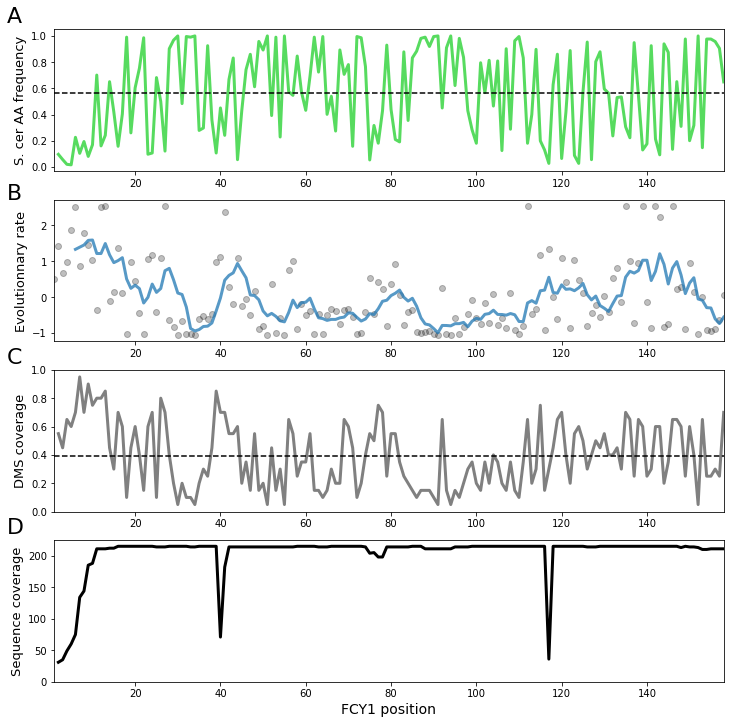

In [53]:
plt.figure(figsize=(12,12))

plt.subplot(412)

plt.plot(new_r4s_df['pos'], new_r4s_df['score'], 'ko', alpha=0.25)
plt.plot(new_r4s_df['score'].rolling(6).mean(), lw=3, alpha=0.75)

plt.xlim(1,158)
plt.ylabel('Evolutionnary rate', fontsize=13)


plt.subplot(414)

plt.plot(range(2,159), coverage_list, 'k', lw=3)
plt.ylim(0,225)
plt.xlim(1,158)

plt.ylabel('Sequence coverage', fontsize=13)
plt.xlabel('FCY1 position', fontsize=14)


ax1 = plt.subplot(411)

plt.plot(data_df[data_df['wt']==data_df['measured']]['codon'], data_df[data_df['wt']==data_df['measured']]['ortholog_aa_freq'], color=colors[1], linestyle='-', lw=3)

plt.axhline(np.nanmean(data_df[data_df['wt']==data_df['measured']]['ortholog_aa_freq']), color='k', linestyle='--')

plt.xlim(1,158)
plt.ylabel('S. cer AA frequency', fontsize=13)

plt.subplot(413)

plt.plot(range(2,159), n_DMS_mutant_list, color='grey', lw=3)

plt.ylim(0,1)
plt.xlim(1,158)
plt.ylabel('DMS coverage', fontsize=13)

plt.axhline(np.mean(n_DMS_mutant_list), color='k', linestyle='--')

ax1.text(-10, 1.1, 'A', fontsize=22)
ax1.text(-10, -0.25, 'B', fontsize=22)
ax1.text(-10, -1.5, 'C', fontsize=22)
ax1.text(-10, -2.8, 'D', fontsize=22)



plt.savefig('./figures/evo_rate_fcy1.svg', format='svg', dpi=300)

## Import distance to active site

In [54]:
distance_source = './pdb/summary_structure_dist_from_act_sites.txt'
# import minimum measured distance to active site for chain A

distance_df = pd.read_csv(distance_source, sep = ' ', header=0)
distance_df.sort_values(by='resnoA', inplace=True)
distance_df.reset_index(inplace=True, drop=True)
distance_df

,resnoA,resA,catres,dist_act_res
0,3,T,94CYS,18.357742
1,4,G,94CYS,21.185155
2,5,G,64GLU,20.131501
3,6,M,64GLU,19.303847
4,7,A,64GLU,18.769834
...,...,...,...,...
151,154,E,155ASP,1.329213
152,155,D,155ASP,0.000000
153,156,I,155ASP,1.328411
154,157,G,155ASP,3.428099


In [55]:
score_dict=dict(distance_df['dist_act_res'])
# convert df colum to dict for easier parsing

indexed_dist_col = {}
# dict container that will be converted to a series once 
# filled

index_val = 0
# index position counter

for x in range(2,159):
    for y in range(0,21):
        # loop through FCY1 positions, then through amino acid variants

        if x == 2:
            indexed_dist_col[index_val] = np.NaN
            # for position 2, no info so annotate as Nan
            index_val+=1
            # increment index

        else:
            indexed_dist_col[index_val] = score_dict[x-3]
            # add info to dict
            index_val+=1
            # increment index
            
indexed_series = pd.Series(indexed_dist_col, name='dist_act_site')
# store interface annotation as a series
indexed_series

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3292    5.711372
3293    5.711372
3294    5.711372
3295    5.711372
3296    5.711372
Name: dist_act_site, Length: 3297, dtype: float64

In [56]:
data_df['dist_act_site'] = indexed_series

In [57]:
save_annotated_df = data_df.to_csv('annotated_df_v5.tsv',sep='\t')
# save df with annotations to file 